In [36]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [37]:
df=pd.read_csv("file:///C:/Users/Md%20Asif%20Ikbal/Downloads/data.csv")
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [38]:
df.shape

(128061, 9)

In [39]:
df.columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [41]:
df.dtypes

Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object

In [42]:
df.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [43]:
df['Gender'].value_counts()

Gender
Male      70432
Female    57629
Name: count, dtype: int64

In [44]:
df['Interest'].value_counts()

Interest
Unknown       48835
Arts          25489
Others        21733
Technology    19103
Sports        12901
Name: count, dtype: int64

In [45]:
df['Personality'].value_counts()

Personality
ENFP    34404
ENTP    24718
INFP    24711
INTP    17132
ESFP     4832
ENFJ     3883
ISFP     3456
ESTP     3334
INFJ     2919
ENTJ     2783
ISTP     2390
INTJ     1920
ESFJ      554
ESTJ      392
ISFJ      371
ISTJ      262
Name: count, dtype: int64

In [46]:

object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [47]:
num_col

['Age',
 'Education',
 'Introversion Score',
 'Sensing Score',
 'Thinking Score',
 'Judging Score']

In [48]:
object_col

['Gender', 'Interest', 'Personality']

In [49]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Age" is
 Age
22.0    11975
23.0    11847
24.0    11354
21.0    10464
25.0    10364
26.0     9609
27.0     8838
28.0     7724
29.0     6708
20.0     6320
30.0     5814
31.0     4908
32.0     4261
33.0     3427
34.0     2888
35.0     2246
19.0     2223
36.0     1720
37.0     1294
38.0     1021
39.0      737
40.0      583
41.0      403
18.0      364
42.0      292
43.0      244
44.0      132
45.0      115
46.0       66
47.0       52
48.0       30
49.0       16
50.0       12
51.0        3
52.0        3
56.0        1
54.0        1
53.0        1
57.0        1
Name: count, dtype: int64
-------------------------------------------------
unique values in column "Gender" is
 Gender
Male      70432
Female    57629
Name: count, dtype: int64
-------------------------------------------------
unique values in column "Education" is
 Education
0    75408
1    52653
Name: count, dtype: int64
-------------------------------------------------
unique values in column "Introversion Sc

In [50]:
le=LabelEncoder()
df_col=('Gender', 'Interest', 'Personality')
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [51]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,4,1
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,2,5
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,4,1
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,1,11
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,3,1


In [52]:
df.dtypes

Age                   float64
Gender                  int64
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest                int64
Personality             int64
dtype: object

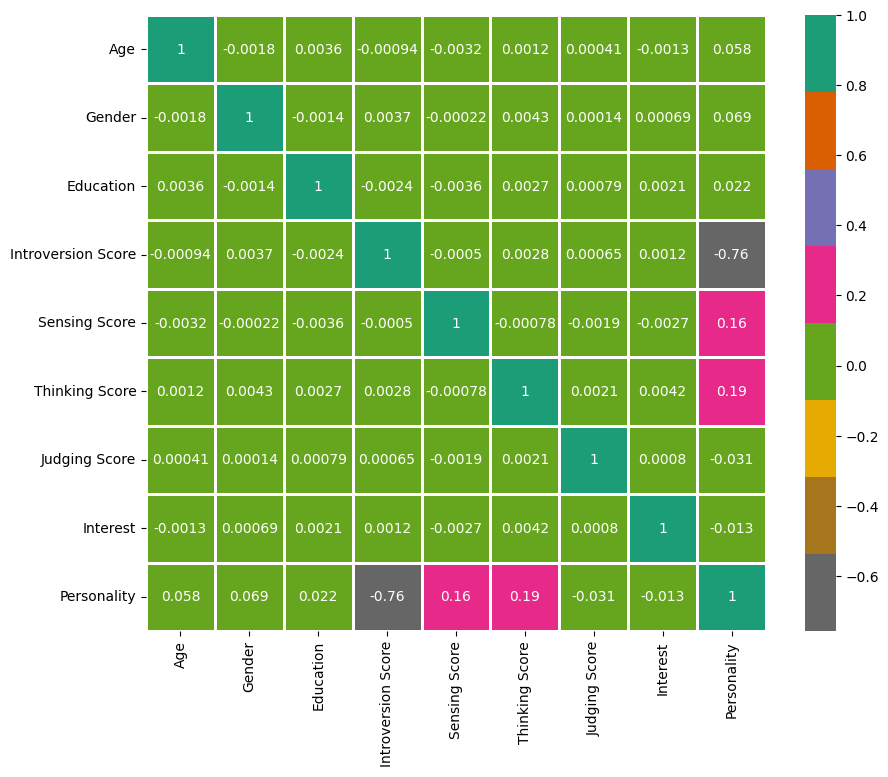

In [53]:
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [54]:
df=df.drop(['Age','Gender','Education','Interest','Judging Score'],axis=True)
df.head()

,Introversion Score,Sensing Score,Thinking Score,Personality
0,9.47080,7.141434,6.03696,1
1,5.85392,6.160195,0.80552,5
2,7.08615,3.388433,2.66188,1
3,2.01892,4.823624,7.30625,11
4,9.91703,4.755080,5.31469,1


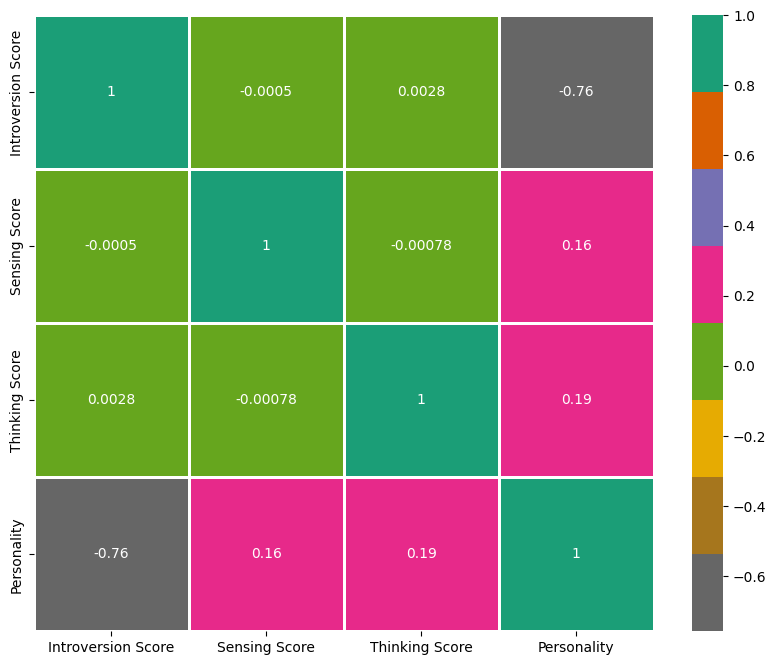

In [55]:
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [56]:
df.shape

(128061, 4)

In [58]:
x=df.drop(['Personality'],axis=True)
y=df.Personality.values

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [61]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pre_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pre_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


69.69988807621229

In [62]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1180
           1       0.73      0.86      0.79     10341
           2       0.00      0.00      0.00       820
           3       0.72      0.83      0.77      7504
           4       0.00      0.00      0.00       158
           5       0.51      0.36      0.42      1420
           6       0.00      0.00      0.00       115
           7       0.38      0.20      0.26       976
           8       0.00      0.00      0.00       924
           9       0.71      0.82      0.76      7389
          10       0.00      0.00      0.00       567
          11       0.69      0.83      0.75      5138
          12       0.00      0.00      0.00       115
          13       0.47      0.40      0.43      1000
          14       0.00      0.00      0.00        71
          15       0.48      0.27      0.35       701

    accuracy                           0.70     38419
   macro avg       0.29   

C:\Users\Md Asif Ikbal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Md Asif Ikbal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Md Asif Ikbal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [64]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

70.8373461047919

In [65]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

           0       0.09      0.00      0.00      1180
           1       0.77      0.83      0.80     10341
           2       0.07      0.00      0.00       820
           3       0.75      0.80      0.77      7504
           4       0.11      0.01      0.02       158
           5       0.50      0.70      0.58      1420
           6       0.05      0.01      0.01       115
           7       0.47      0.66      0.55       976
           8       0.12      0.01      0.01       924
           9       0.74      0.80      0.77      7389
          10       0.03      0.00      0.00       567
          11       0.73      0.77      0.75      5138
          12       0.00      0.00      0.00       115
          13       0.48      0.65      0.55      1000
          14       0.00      0.00      0.00        71
          15       0.49      0.64      0.55       701

    accuracy                           0.71     38419
   macro avg       0.34   

In [71]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','RandomForestClassifier'],
    'Score': [accu_lo,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,RandomForestClassifier,70.837346
0,LogisticRegression,69.699888


In [72]:
df.shape

(128061, 4)

In [75]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a DataFrame
df = df
# Calculate the Z-scores for each column
z_scores = np.abs(stats.zscore(df))

# Define a threshold to consider data as an outlier
threshold = 3  # Z-score greater than 3 is considered an outlier

# Identify rows that are not outliers
df_clean = df[(z_scores < threshold).all(axis=1)]

# Print the original data, outliers, and the clean data
print("Original Data:")
print(df)
print("\nClean Data (Outliers removed):")
print(df_clean)

# Optionally, you can store the clean data in a new variable
clean_data_ = df_clean
clean_data_.shape

Original Data:
        Introversion Score  Sensing Score  Thinking Score  Personality
0                  9.47080       7.141434         6.03696            1
1                  5.85392       6.160195         0.80552            5
2                  7.08615       3.388433         2.66188            1
3                  2.01892       4.823624         7.30625           11
4                  9.91703       4.755080         5.31469            1
...                    ...            ...             ...          ...
128056             5.11456       7.764336         5.72341            7
128057             3.00078       2.525392         4.71081            9
128058             8.16219       3.433857         2.45531            1
128059             9.37782       5.077443         1.79598            0
128060             7.78827       4.770737         3.18600            0

[128061 rows x 4 columns]

Clean Data (Outliers removed):
        Introversion Score  Sensing Score  Thinking Score  Personality
0  

(127596, 4)

In [76]:
df.shape

(128061, 4)

In [77]:
df.head()

,Introversion Score,Sensing Score,Thinking Score,Personality
0,9.47080,7.141434,6.03696,1
1,5.85392,6.160195,0.80552,5
2,7.08615,3.388433,2.66188,1
3,2.01892,4.823624,7.30625,11
4,9.91703,4.755080,5.31469,1


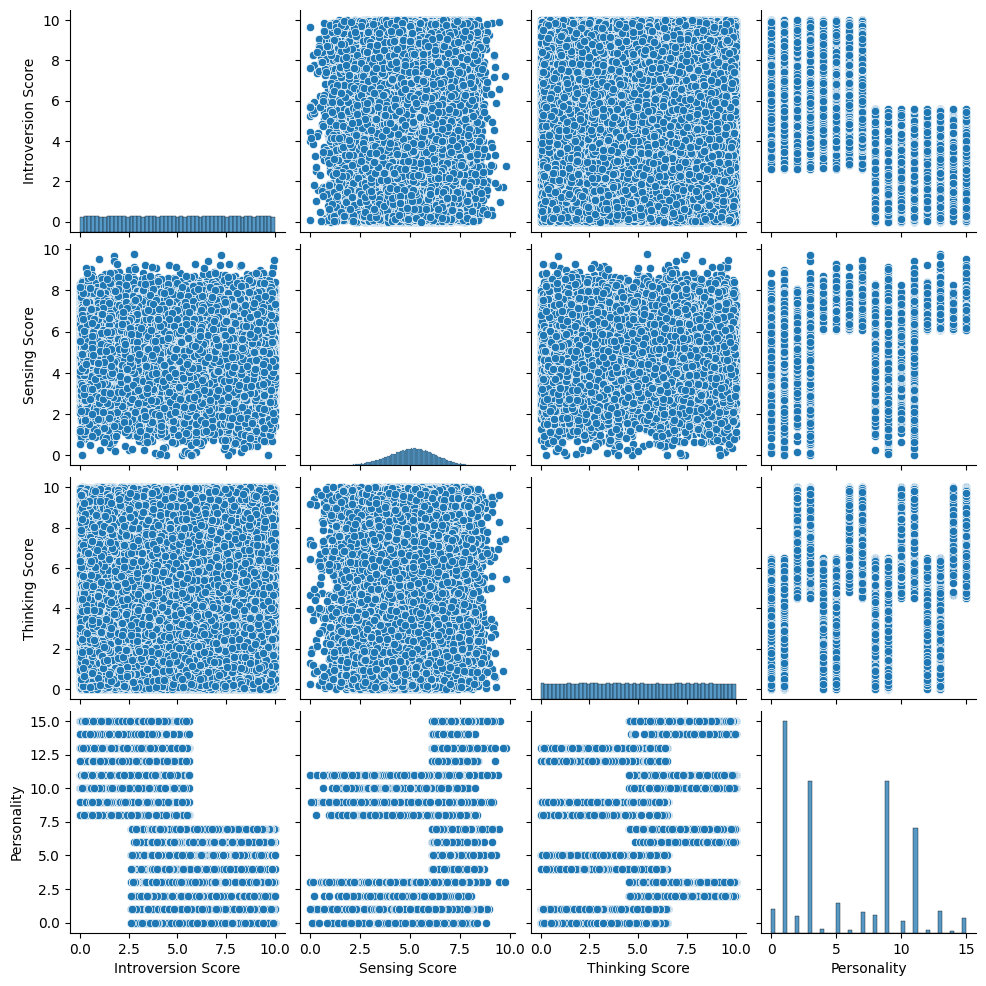

In [79]:
sns.pairplot(df)

<Axes: ylabel='count'>

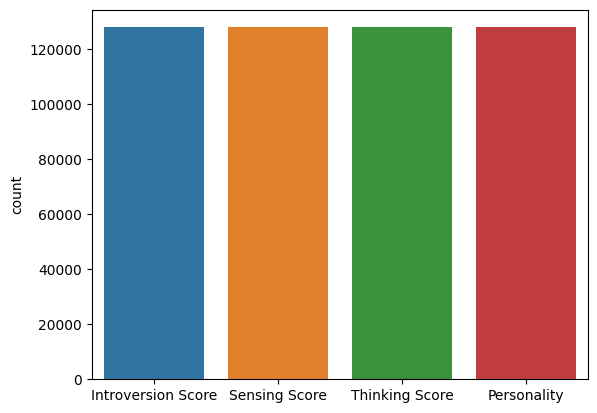

In [81]:
sns.countplot(df)